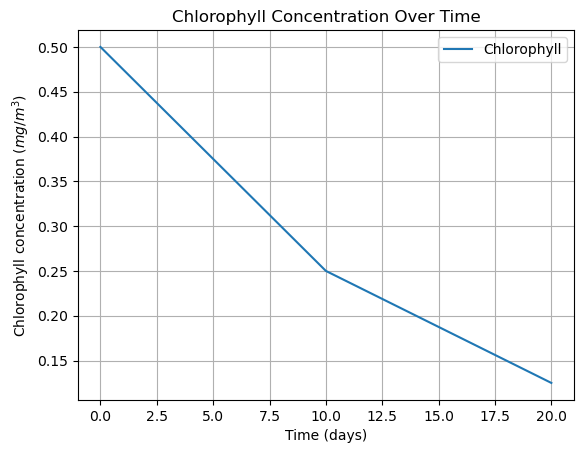

In [11]:
#the Euler forward method
import pylab as pl
import matplotlib.pyplot as plt
t0=0 #time is in days
tn=20
dt=10
kappa=0.05 #day-1
C0=0.5 # mg chl/m3

def F(k,C): #define the function for the right hand side of the equation
    return -k*C

#compute the total number of steps
Ntot= (pl.floor ((tn-t0)/dt)+1).astype(int)

#initialization
C=pl.zeros(Ntot)
t=C.copy() #this array stores the time and has the same size as C
t[0]= t0
C[0]=C0

#start tht loop
for n in range (Ntot -1):
    C[n+1]= C[n] + F(kappa, C[n])*dt
    t[n+1]= t[n] + dt
# Plotting
plt.plot(t, C, label='Chlorophyll')
plt.xlabel('Time (days)')
plt.ylabel('Chlorophyll concentration ($mg/m^3$)')
plt.title('Chlorophyll Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

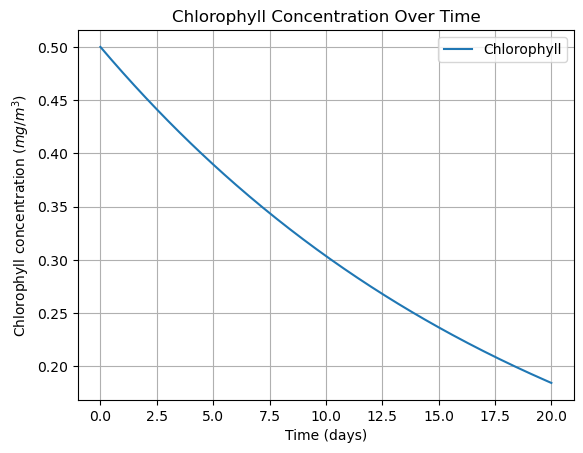

In [10]:
#the backwards method with one timestep
import matplotlib.pyplot as plt
import numpy as np

t0 = 0  # time is in days
tn = 20
dt = 0.1  # decrease dt for smoother plot
kappa = 0.05  # day-1
C0 = 0.5  # mg chl/m3

def F(k, C, dt):
    return C / (1 + k * dt)

# compute the total number of steps
Ntot = int(np.floor((tn - t0) / dt) + 1)

# initialization
C = np.zeros(Ntot)
t = np.zeros(Ntot)
t[0] = t0
C[0] = C0

# start the loop
for n in range(Ntot - 1):
    C[n + 1] = F(kappa, C[n], dt)
    t[n + 1] = t[n] + dt

# Plotting
plt.plot(t, C, label='Chlorophyll')
plt.xlabel('Time (days)')
plt.ylabel('Chlorophyll concentration ($mg/m^3$)')
plt.title('Chlorophyll Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

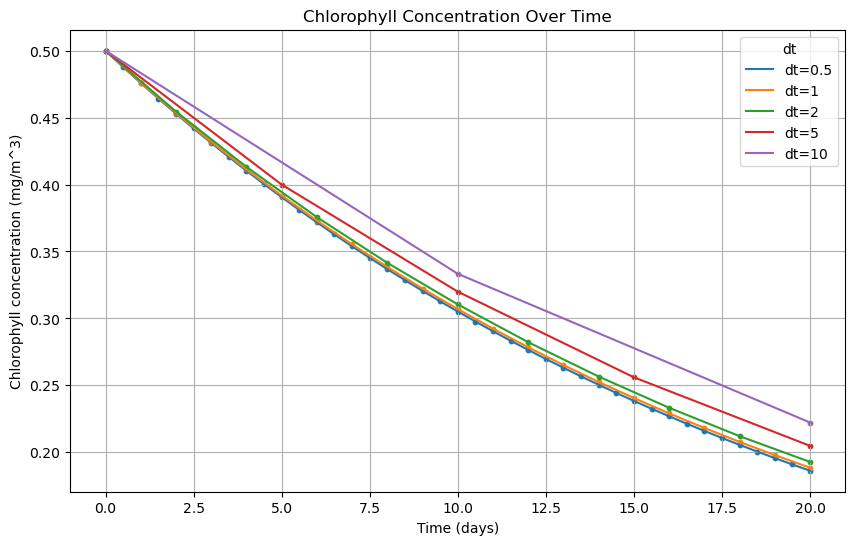

In [12]:
import matplotlib.pyplot as plt
import numpy as np

t0 = 0  # time is in days
tn = 20
dt_values = [0.5, 1, 2, 5, 10]  # different values of dt
kappa = 0.05  # day-1
C0 = 0.5  # mg chl/m3

def F(k, C, dt):
    return C / (1 + k * dt)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for dt in dt_values:
    # compute the total number of steps
    Ntot = int(np.floor((tn - t0) / dt) + 1)

    # initialization
    C = np.zeros(Ntot)
    t = np.zeros(Ntot)
    t[0] = t0
    C[0] = C0

    # start the loop
    for n in range(Ntot - 1):
        C[n + 1] = F(kappa, C[n], dt)
        t[n + 1] = t[n] + dt

    # Get a unique color for each line
    color = next(plt.gca()._get_lines.prop_cycler)['color']

    # Plotting curve
    plt.plot(t, C, label=f'dt={dt}', color=color)

    # Plotting points with the same color
    plt.scatter(t, C, color=color, s=10, label='_nolegend_')  # Add _nolegend_ to not duplicate legend entries

plt.xlabel('Time (days)')
plt.ylabel('Chlorophyll concentration (mg/m^3)')
plt.title('Chlorophyll Concentration Over Time')

# Add legend
plt.legend(title='dt', loc='upper right')
plt.grid(True)
plt.show()

**The accuracy of the measurements improves with larger timesteps unlike the Euler forward method where larger timesteps cause a divergence towards negative chlorophyll values. Overall the curves for the Euler Backward method are smoother, with less oscillation and variability compared to the Euler Forward method.**